In [69]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler 

In [70]:
df = pd.read_csv ('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df = df.drop('customerID', axis = 1)

In [5]:
df.TotalCharges = df.TotalCharges.str.replace(' ', '0').astype(float)

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

***
# 데이터 탐색 - 기초 통계 및 시각화

In [7]:
plt.style.use("fivethirtyeight")

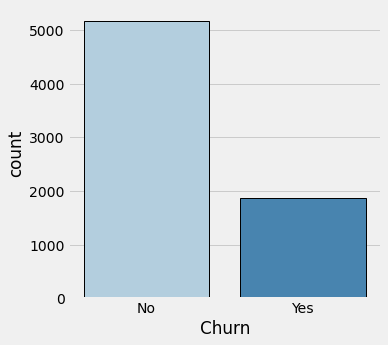

In [8]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df['Churn'], palette="Blues", linewidth=1, edgecolor = (0, 0, 0)) # Churn 의 빈도 분포
plt.show()

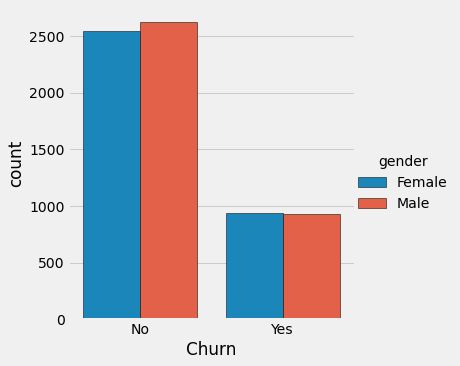

In [9]:
sns.catplot(x = "Churn", kind = "count", hue = "gender", data = df, edgecolor = (0, 0, 0))
plt.show()

In [10]:
plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 22, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}
def boxplot (x, y, df):                                                             #boxplots 작업
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))

    for i, j in enumerate (y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot (x=x, y=j, data=df[[x, j]], palette="Blues", linewidth=1)
        ax.set_title(j)

    return plt.show()

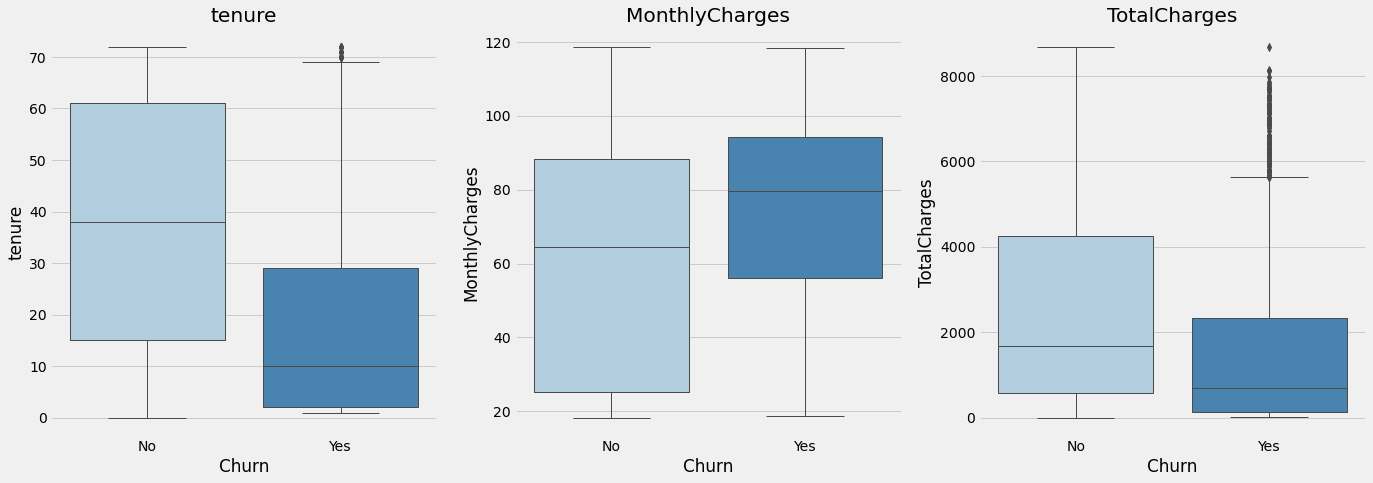

In [11]:
boxplot("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], df)    #tenure, MonthlyCharges, TotalCharges 변수의 Churn 과의 관계를 보기 위한 boxplots 

In [12]:
def countplot (x, y, df):              #countplots 만들기
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])

    plt.figure(figsize=(7*columns, 7*rows))


    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot (x=j, hue=x, data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)

    return plt.show()

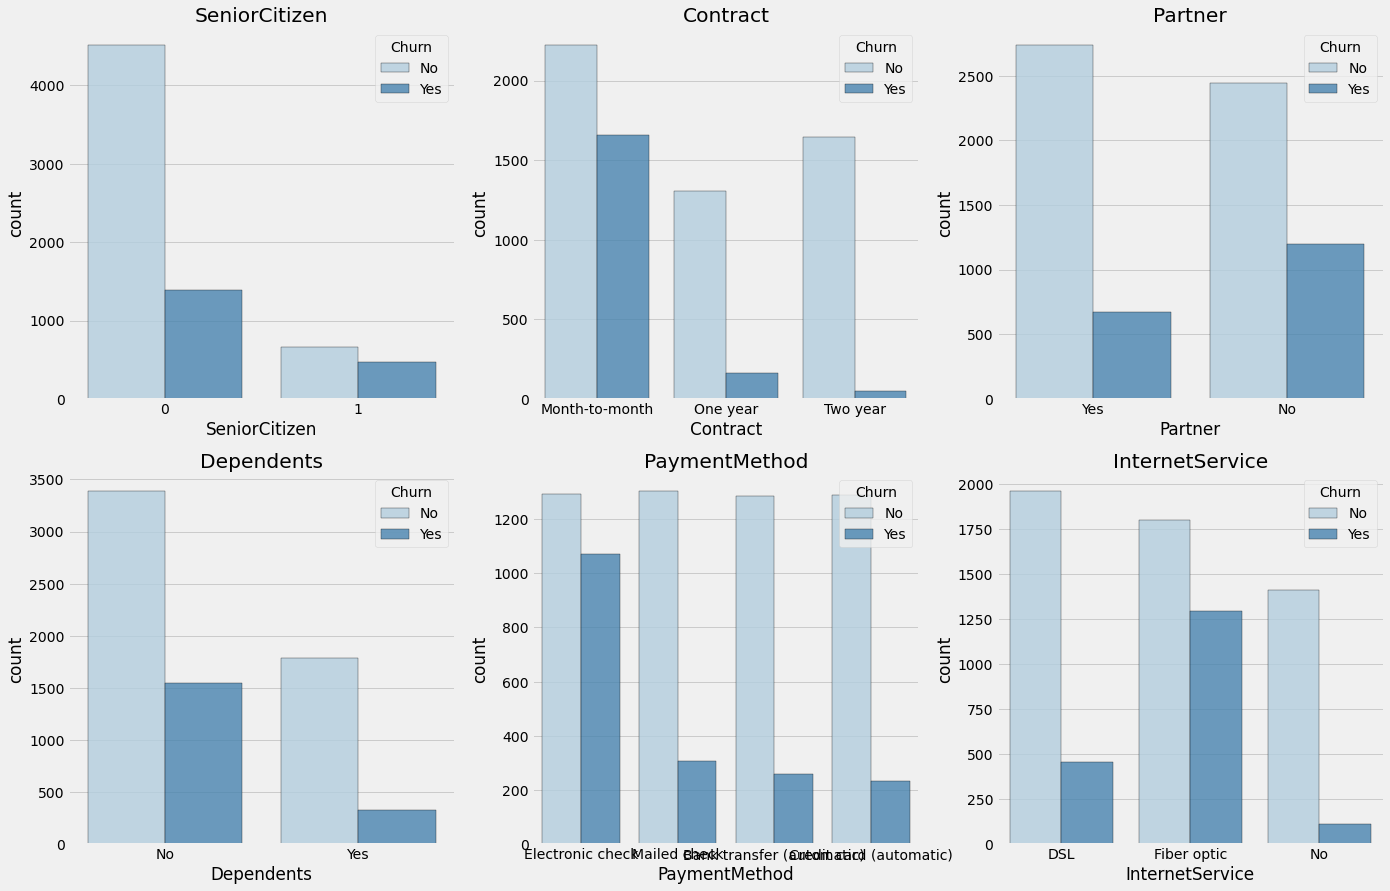

In [13]:
countplot ("Churn", ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], df)

In [14]:
df['Churn'] = [1 if v == 'Yes' else 0 for v in df['Churn']]

In [15]:
df ['Number_AdditionalSerivces'] = (df[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1)  # 고객 서비스 feature 중 6개를 하나의 countplot에 표현하기 위해 새로운 feature로 만듬

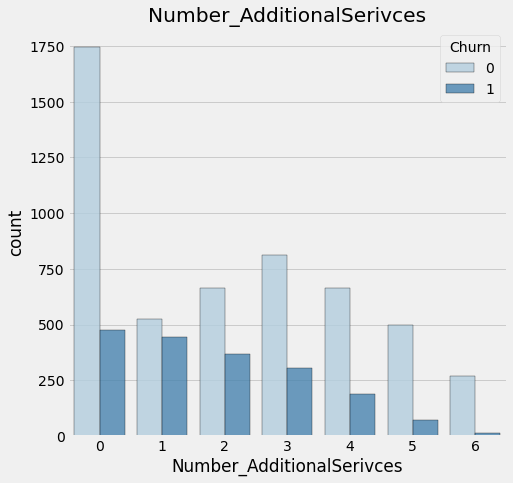

In [16]:
countplot ('Churn', ['Number_AdditionalSerivces'], df)

***

## 데이터 전처리

In [17]:
df['gender'] = [1 if g == 'Male' else 0 for g in df['gender']]

In [18]:
df['Partner'] = [1 if v == 'Yes' else 0 for v in df['Partner']]

In [19]:
df['Dependents'] = [1 if v == 'Yes' else 0 for v in df['Dependents']]

In [20]:
df['PhoneService'] = [1 if v == 'Yes' else 0 for v in df['PhoneService']]

In [21]:
df['PaperlessBilling'] = [1 if v == 'Yes' else 0 for v in df['PaperlessBilling']]

In [22]:
df = pd.get_dummies(df)

#### Scaling

In [24]:
scaler = MinMaxScaler()

In [25]:
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

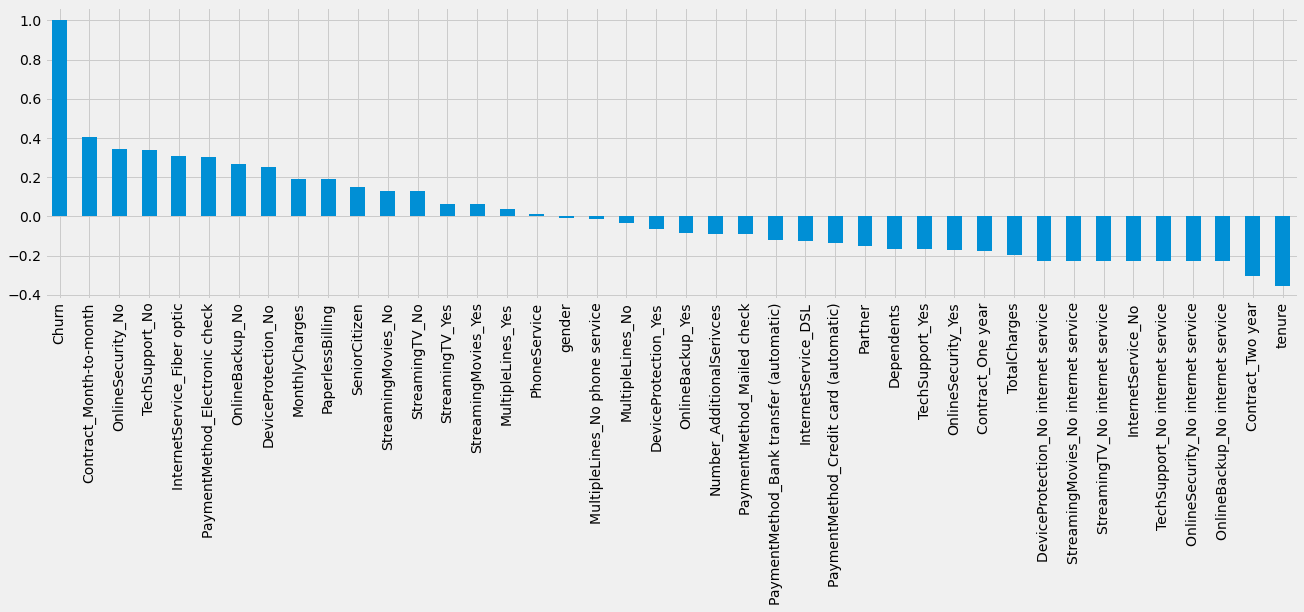

In [26]:
plt.figure(figsize=(16,10))   #correlation (상관관계) 확인, Churn과 feature 들의 상관관계 정도를 파악해 Churn의 원인 파악 가능
df.corr( ) ['Churn'].sort_values (ascending=False).plot(kind='bar', figsize=(20,5))
plt.show()

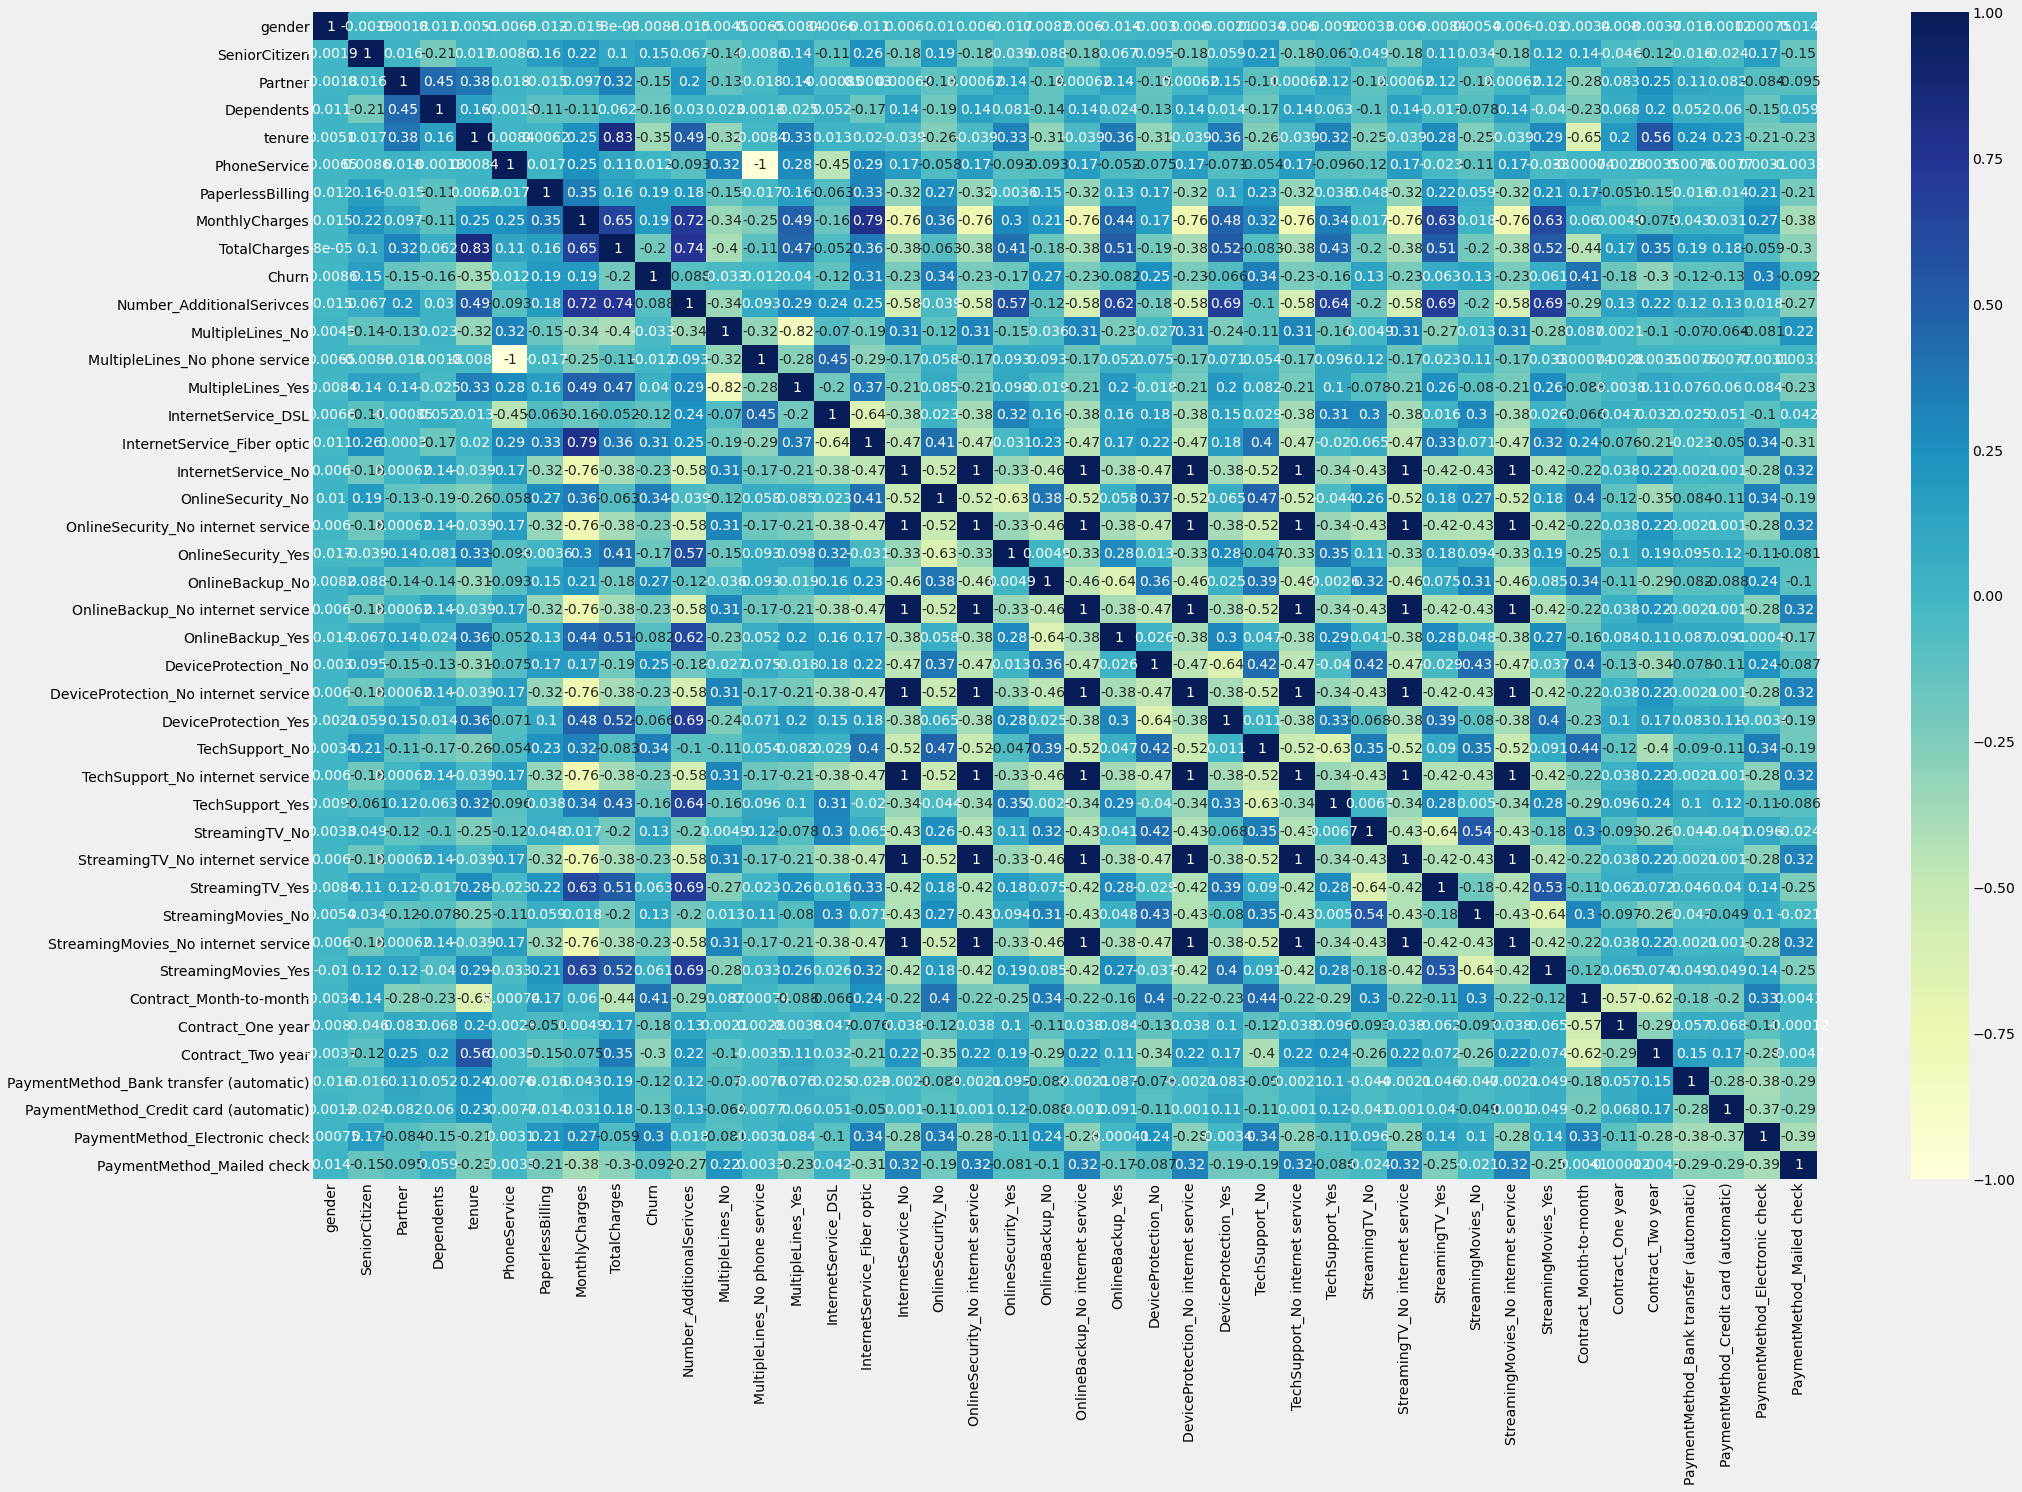

In [27]:
plt.figure(figsize = (30, 20))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [28]:
df.corr()['Churn']

gender                                    -0.008612
SeniorCitizen                              0.150889
Partner                                   -0.150448
Dependents                                -0.164221
tenure                                    -0.352229
PhoneService                               0.011942
PaperlessBilling                           0.191825
MonthlyCharges                             0.193356
TotalCharges                              -0.198324
Churn                                      1.000000
Number_AdditionalSerivces                 -0.087698
MultipleLines_No                          -0.032569
MultipleLines_No phone service            -0.011942
MultipleLines_Yes                          0.040102
InternetService_DSL                       -0.124214
InternetService_Fiber optic                0.308020
InternetService_No                        -0.227890
OnlineSecurity_No                          0.342637
OnlineSecurity_No internet service        -0.227890
OnlineSecuri

***
## 모델링

In [29]:
X = df.drop(['Churn', 'Number_AdditionalSerivces'], axis = 1)
y = df.Churn

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [32]:
svc = SVC(random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 5)

In [33]:
models = [svc, knn]

In [34]:
for model in models :
    print(f'{model.__class__.__name__} Training Begins...')
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    acc = accuracy_score(y_val, pred)
    print(f'ACCURACY = {acc}\n')  

SVC Training Begins...
ACCURACY = 0.7892122072391767

KNeighborsClassifier Training Begins...
ACCURACY = 0.7501774308019872



***
## 파라미터 튜닝


### CV - StratifiedKFold(Classification 이기 때문)


In [37]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

### 1) SVC

In [38]:
svc_params = {'C' : [0.05, 0.5, 1, 10, 100], 'degree' : [3, 5, 7, 9]}

파라미터 조합을 탐색할 파라미터와 값 범위를 세팅한다.

In [39]:
svc_cv = GridSearchCV(svc, svc_params, scoring = 'accuracy', cv = skf, n_jobs = -1)

격자 탐색 방식을 활용해 정확도 기준으로 최적의 파라미터 조합 탐색

In [40]:
svc_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.05, 0.5, 1, 10, 100], 'degree': [3, 5, 7, 9]},
             scoring='accuracy')

In [41]:
svc_cv.best_params_

{'C': 1, 'degree': 3}

최적의 파라미터 조합이 결정된 것을 알 수 있다.

In [43]:
tuned_svc = SVC(**svc_cv.best_params_, random_state = 42)

최적의 파라미터 조합으로 모델 재구성

In [44]:
tuned_svc.fit(X_train, y_train)

SVC(C=1, random_state=42)

In [45]:
pred = tuned_svc.predict(X_val)

In [46]:
acc = accuracy_score(y_val, pred)

In [47]:
acc

0.7892122072391767

기존 정확도와 동일한 것을 알 수 있다.
***
### 2) KNN

In [56]:
knn_params = {'n_neighbors' : [3, 4, 5, 6, 7], 'p' : [2, 3, 4, 5], 'leaf_size' : [10, 20, 30, 50]}

파라미터 조합을 탐색할 파라미터와 값 범위를 세팅한다.

In [57]:
knn_cv = GridSearchCV(knn, knn_params, scoring = 'accuracy', cv = skf, n_jobs = -1)

격자 탐색 방식을 활용해 정확도 기준으로 최적의 파라미터 조합 탐색

In [59]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [10, 20, 30, 50],
                         'n_neighbors': [3, 4, 5, 6, 7], 'p': [2, 3, 4, 5]},
             scoring='accuracy')

In [63]:
knn_cv.best_params_

{'leaf_size': 10, 'n_neighbors': 6, 'p': 5}

최적의 파라미터 조합이 결정된 것을 알 수 있다.

In [64]:
tuned_knn = KNeighborsClassifier(**knn_cv.best_params_)

최적의 파라미터 조합으로 모델 재구성

In [65]:
tuned_knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=6, p=5)

In [66]:
pred = tuned_knn.predict(X_val)

In [67]:
acc = accuracy_score(y_val, pred)

In [68]:
acc

0.759403832505323

기존 정확도 0.7501 보다 약 0.0093 향상되었다.